<a href="https://colab.research.google.com/github/AmiranGozalishvili/Data_Science_course/blob/main/Bicycle_Rental_Dataset_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline

import numpy as np

import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt

import seaborn as sns

import itertools

from tqdm.notebook import tqdm as tqdm

from scipy.spatial import distance

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR

from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import GridSearchCV, KFold


In [ ]:
data = pd.read_csv('/content/hour.csv')

In [ ]:
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [ ]:
data.season.value_counts()

3    4496
2    4409
1    4242
4    4232
Name: season, dtype: int64

In [ ]:
data.weathersit.value_counts()

1    11413
2     4544
3     1419
4        3
Name: weathersit, dtype: int64

<AxesSubplot:xlabel='mnth', ylabel='cnt'>

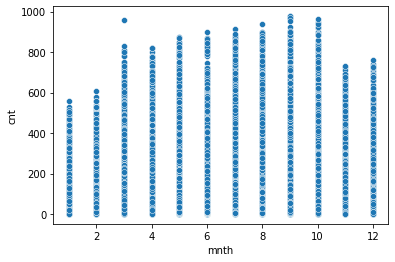

In [ ]:
sns.scatterplot(data=data, x="mnth", y="cnt")

<AxesSubplot:xlabel='hum', ylabel='cnt'>

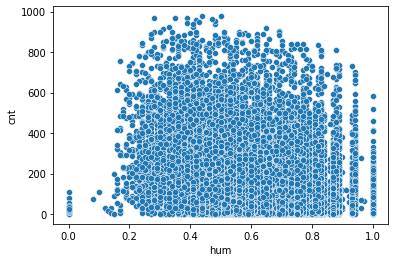

In [ ]:
sns.scatterplot(data=data, x="hum", y="cnt")

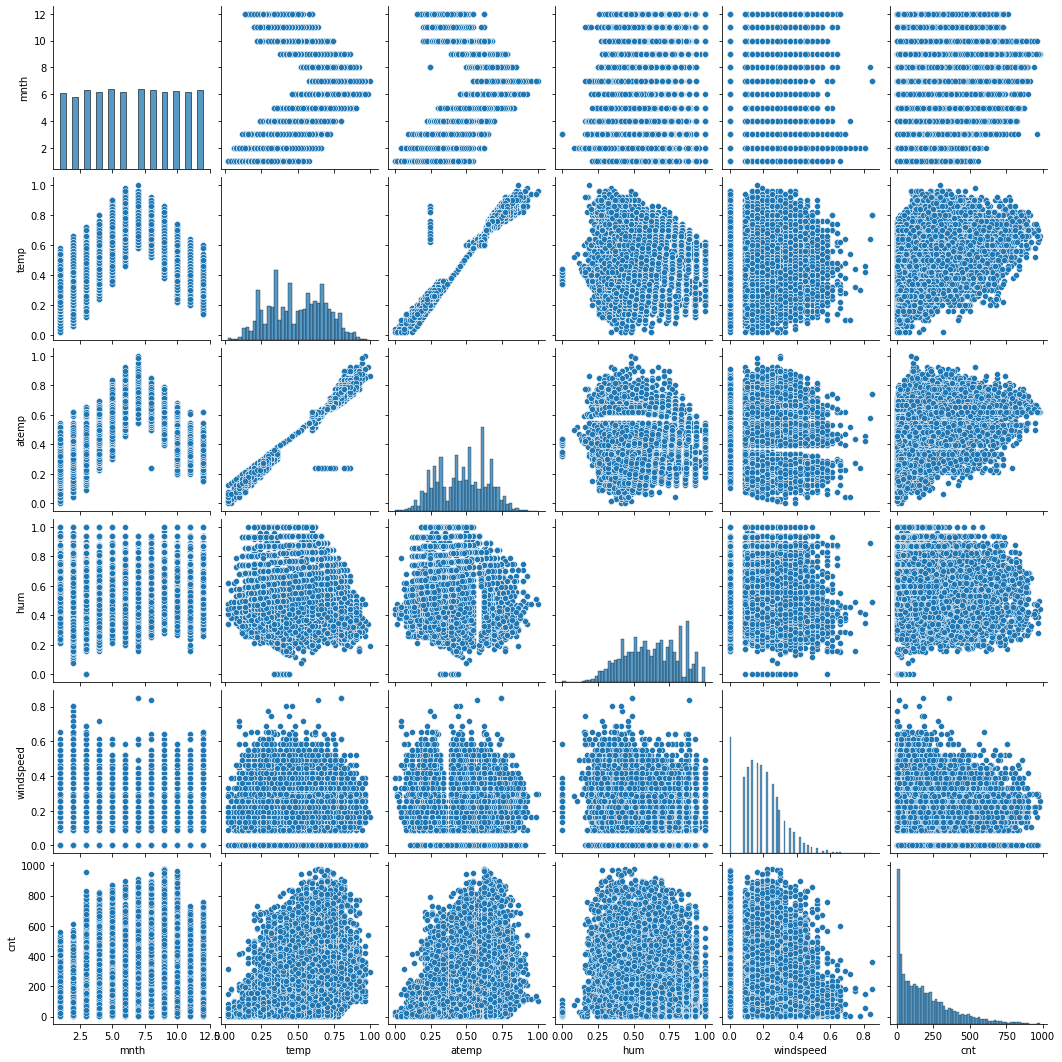

In [ ]:
sns.pairplot(data[['mnth','temp', 'atemp', 'hum', 'windspeed', 'cnt']])

<AxesSubplot:>

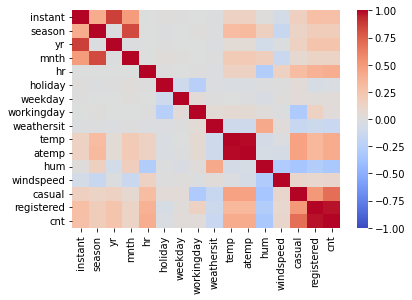

In [ ]:
sns.heatmap(data.corr(), cmap="coolwarm", vmin=-1, vmax=1)

In [ ]:
df = data

In [ ]:
df.instant.unique()   # hourly records

array([    1,     2,     3, ..., 17377, 17378, 17379])

In [ ]:
len(df.dteday.unique())

731

In [ ]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [ ]:
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [ ]:
df = df.drop(['dteday', 'casual', 'registered'], axis=1)

# Train Test split

Training, Test data = Trian Test split

Target data = one target column 'cnt'

In [ ]:
df.head()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [ ]:
X=df.drop(['cnt'], axis=1)
y=df['cnt']

In [ ]:
random_state=42
def traintestsplit(X, y):
  X_train, X_test, y_train, y_test = train_test_split(
      X, y, test_size=0.15, random_state=random_state
  )
  return X_train, X_test, y_train, y_test

In [ ]:
X_train, X_test, y_train, y_test = traintestsplit(X, y)

In [ ]:
def metrics(y_pred, y_test):
  print(f'R2 score: {r2_score(y_pred, y_test)}')
  print(f'MSE score: {mean_squared_error(y_pred, y_test)}')
  print(f'MAE score: {mean_absolute_error(y_pred, y_test)}')
  print(f'MAPE score: {mean_absolute_percentage_error(y_pred, y_test)}')

Text(0, 0.5, 'Accuracy Score')

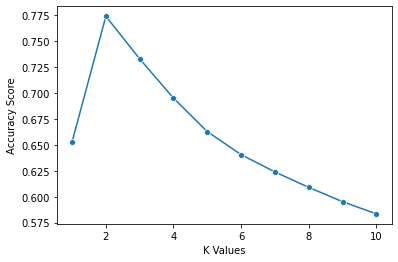

In [ ]:
k_values = [i for i in range (1,11)]
scores = []

for k in k_values:
    knr = KNeighborsRegressor(n_neighbors=k, weights='distance')
    score = cross_val_score(knr, X_train, y_train, cv=10)
    scores.append(np.mean(score))

sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

best score with k = 2

In [ ]:
def knn_regression(X_train, X_test, y_train, y_test):
  knr = KNeighborsRegressor(n_neighbors=2, weights='distance')
  knr.fit(X_train, y_train)
  knr_y_pred = knr.predict(X_test)
  metrics(knr_y_pred, y_test)
  return knr_y_pred

In [ ]:
knn_regression(X_train, X_test, y_train, y_test)

R2 score: 0.7815549637681958
MSE score: 5802.251613258975
MAE score: 45.45708520833554
MAPE score: 0.4130289357562394


array([433.44427852, 103.99802332,  13.99976272, ..., 519.35419819,
        79.35572697, 108.45729011])

In [ ]:
def dec_tree_regression(X_train, X_test, y_train, y_test):
  dtr = DecisionTreeRegressor(criterion="squared_error", max_depth=10, min_samples_split=30)
  dtr.fit(X_train, y_train)
  dtr_y_pred = dtr.predict(X_test)
  metrics(dtr_y_pred, y_test)
  return dtr_y_pred

In [ ]:
def g_s_decision_tree():
    '''Grid-Search'''
    dtr = DecisionTreeRegressor()

    parameters={
          "criterion": ['squared_error', 'absolute_error'],
          "splitter":["best","random"],
          "max_depth" : [1,3,5,7,9,11]}

    # determine which combination of parameters leads to the best results
    grid_search = GridSearchCV(estimator=dtr,
                               param_grid=parameters,
                               scoring='r2',
                               cv=5)

    grid = grid_search.fit(X_train, y_train)
# scoring=['r2', 'neg_mean_squared_error', 'neg_mean_absolute_error']
    print('Best r2 score: {}'.format(grid.best_score_))
    print('Best parameters: {}'.format(grid.best_params_))

In [ ]:
g_s_decision_tree()

Best r2 score: 0.903609198690944
Best parameters: {'criterion': 'squared_error', 'max_depth': 11, 'splitter': 'best'}


In [ ]:
dec_tree_regression(X_train, X_test, y_train, y_test)

R2 score: 0.8853958457952044
MSE score: 3317.4698500586746
MAE score: 35.5194363028188
MAPE score: 0.27624559813550725


array([399.65714286, 105.75925926,   9.57142857, ..., 387.54166667,
        31.54545455, 110.58181818])

In [ ]:
def adabst_regression(X_train, X_test, y_train, y_test):
  abr = AdaBoostRegressor(estimator=DecisionTreeRegressor(criterion="squared_error", max_depth=10, min_samples_split=20), n_estimators=25)
  abr.fit(X_train, y_train)
  abr_y_pred = abr.predict(X_test)
  metrics(abr_y_pred, y_test)
  return abr_y_pred

In [ ]:
adabst_regression(X_train, X_test, y_train, y_test)

R2 score: 0.9299799932010586
MSE score: 2001.103772481834
MAE score: 28.715745401258587
MAPE score: 0.23321738028899658


array([390.85714286,  98.83333333,   9.76086957, ..., 504.06666667,
        72.64285714, 123.88888889])

In [ ]:
def rf_regression(X_train, X_test, y_train, y_test):
  rfr = RandomForestRegressor(criterion="squared_error", n_estimators=30, max_depth=10, min_samples_split=30)
  rfr.fit(X_train, y_train)
  rf_y_pred = rfr.predict(X_test)
  metrics(rf_y_pred, y_test)
  return rf_y_pred

In [ ]:
rf_regression(X_train, X_test, y_train, y_test)

R2 score: 0.9059621775183766
MSE score: 2635.775308585748
MAE score: 31.63037193849596
MAPE score: 0.2370508507938011


array([391.64664361, 101.64956511,   9.44217933, ..., 424.73957991,
        43.03026637, 106.23027299])

In [ ]:
def svr(X_train, X_test, y_train, y_test):
  svr = SVR(C=500000, kernel='rbf', degree=3)
  svr.fit(X_train, y_train)
  svr_y_pred = svr.predict(X_test)
  metrics(svr_y_pred, y_test)
  return svr_y_pred

In [ ]:
svr(X_train, X_test, y_train, y_test)

R2 score: -1.3182749943988008
MSE score: 22522.21008056608
MAE score: 104.64592572528674
MAPE score: 1.053851212546612


array([360.19684324, 219.85263749,  31.37241171, ..., 238.27932645,
       124.03399937,  72.31025551])

Training data = First year results

Test data = Second year results

Target data = column 'cnt'

Training model = knn_regression

In [ ]:
df1 = data.copy()

In [ ]:
df1.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
df1 = df1.drop(['dteday'], axis=1)

In [ ]:
df2 = pd.DataFrame(df1)   # dataframe for train
df3 = pd.DataFrame(df1)   # dataframe for validation

In [ ]:
df2 = df2[df2.yr == 0]
df3 = df3[df3.yr == 1]
train_x = df2.drop(['casual', 'registered','cnt'], axis=1)  #X_train
test_x = df3.drop(['casual', 'registered','cnt'], axis=1)  #X_test

train_y = df2['cnt'] #y_train
test_y = df3['cnt'] #y_test

In [ ]:
df2.head()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
dec_tree_regression(train_x, test_x, train_y, test_y)

R2 score: -0.12016896896205753
MSE score: 18426.452046008315
MAE score: 92.9280162579613
MAPE score: 0.7436397654154819


array([18.625     , 18.625     , 17.85185185, ..., 63.36956522,
       28.18181818, 27.26315789])

Train our data on the first year and validate on the second year. has worst results. i think this happened because, now model took less information on training set.

Training, Test data = firs year, second year

Target data = multi target columns 'casual', 'registered', 'cnt'

Training model = MultiOutputRegressor with RandomForestRegressor for
multi target

knn_regression for one by one prediction

In [ ]:
X_train_mult = train_x
X_test_mult = test_x
# train target data
y_mult=df2[['casual', 'registered']]

y_casual=df2['casual']
y_registered = df2['registered']

y_cnt=df2['cnt']

# test target data
y_test_mult=df3[['casual', 'registered']]

y_test_casual=df3['casual']
y_test_registered = df3['registered']

y_test_cnt=df3['cnt']

In [ ]:
X_test_mult

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
8645,8646,1,1,1,0,0,0,0,1,0.36,0.3788,0.66,0.0000
8646,8647,1,1,1,1,0,0,0,1,0.36,0.3485,0.66,0.1343
8647,8648,1,1,1,2,0,0,0,1,0.32,0.3485,0.76,0.0000
8648,8649,1,1,1,3,0,0,0,1,0.30,0.3333,0.81,0.0000
8649,8650,1,1,1,4,0,0,0,1,0.28,0.3030,0.81,0.0896
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642
17375,17376,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642
17376,17377,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642
17377,17378,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343


In [ ]:
def multioutput(X_train, X_test, y_train, y_test):
  max_depth = 30
  regr_multirf = MultiOutputRegressor(
      RandomForestRegressor(n_estimators=100, max_depth=max_depth, random_state=0)
  )
  regr_multirf.fit(X_train, y_train)

  regr_rf = RandomForestRegressor(n_estimators=100, max_depth=max_depth, random_state=2)
  regr_rf.fit(X_train, y_train)

  # Predict on new data
  y_multirf = regr_multirf.predict(X_test)
  y_rf = regr_rf.predict(X_test)

  print('MultiOutputRegressor multitarget scores')
  metrics(y_multirf, y_test)

  print('RandomForestRegressor multitarget scores')
  metrics(y_rf, y_test)

In [ ]:
multioutput(X_train_mult, X_test_mult, y_mult, y_test_mult)

MultiOutputRegressor multitarget scores
R2 score: -1.0110936789568035
MSE score: 10536.148455038969
MAE score: 54.44465079001603
MAPE score: 0.7842526632486172
RandomForestRegressor multitarget scores
R2 score: -0.8573677138611001
MSE score: 8875.472027490254
MAE score: 51.91779711472388
MAPE score: 0.8492493105658013


prediction on target column 'casual'

In [ ]:
dec_tree_regression(X_train_mult, X_test_mult, y_casual, y_test_casual)

R2 score: 0.23518330404671695
MSE score: 1161.7332409335877
MAE score: 19.518959253630307
MAPE score: 2578199924073.951


array([7.23076923, 7.23076923, 7.23076923, ..., 4.22077922, 4.22077922,
       4.22077922])

prediction on target column 'registered'

In [ ]:
dec_tree_regression(X_train_mult, X_test_mult, y_registered, y_test_registered)

R2 score: -4.824235653046668
MSE score: 27676.42366940247
MAE score: 104.03061909231985
MAPE score: 1.1687434845372364


array([ 9.        ,  9.        , 34.46153846, ..., 38.80952381,
       38.80952381, 37.68      ])

prediction on target column 'cnt'

In [ ]:
dec_tree_regression(X_train_mult, X_test_mult, y_cnt, y_test_cnt)

R2 score: -0.12126765712371235
MSE score: 18481.09241057191
MAE score: 93.16917454987482
MAPE score: 0.7644655900939905


array([18.625     , 18.625     , 27.83333333, ..., 63.36956522,
       28.18181818, 27.26315789])

multitarget 'casual', 'registered' model gives better results,
than model with target 'cnt'

one target model with column 'casual' have better result than
model with target 'registered',

I think is't because casual clients data are more accurate to predict, than registered clients.

if we compare models with targets 'casual' 'registered' to model with 'cnt'

one by one they have good result than 'cnt'.

as i think:

if we say that casual clients data has good influence for busyness than registered data

we can also say that registered data information has a bad influence on casual
data.



What are the most influential features?

I think for casual clients most influental features can be 'weathersit' and 'season'.

but for registered clients will be features 'weathersit', 'season', 'temp',
'windspeed'.



How the temperature and humidity affect rental count rates?

if temperature or humidity are very high or very low rental counts are less.

What is more important: current season or current hour, temperature or feeling temperature? Why?

I think season and temperature can be more importand features. beacause it is't comfortable to get bike in winter while snowing outside or in other seasons as part of autumn and spring, while weather is more windy and rainy.
